In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('C:/Users/USER/Downloads/Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


### Exploratory Data Analysis

In [13]:
#Checking the datatypes of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [17]:
#Checking for duplictaes

df.duplicated().sum()

np.int64(0)

No duplicates

In [22]:
#Checking for null values

df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

No nulls

In [27]:
#Getting statistical summaries

df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


### Visualizing relationships between variables

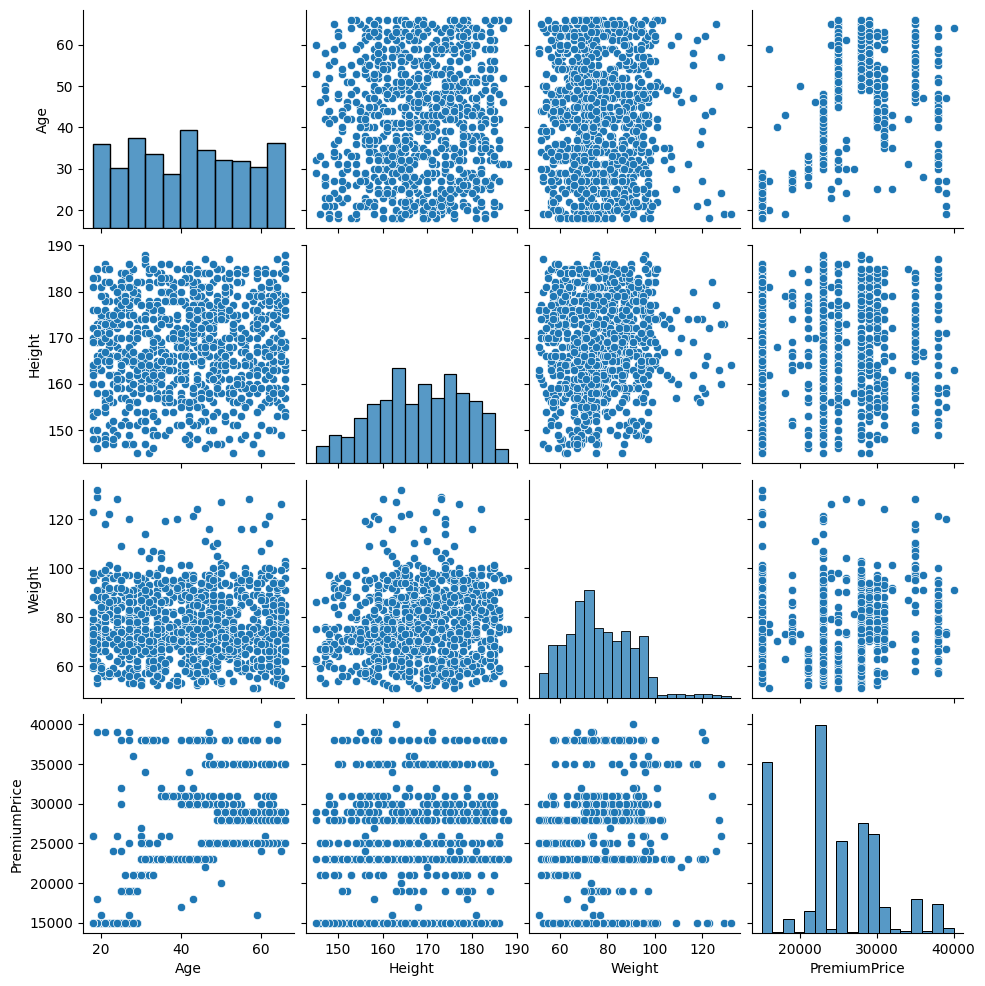

In [240]:
columns = df[['Age', 'Height', 'Weight', 'PremiumPrice']]

sns.pairplot(columns)
plt.show()

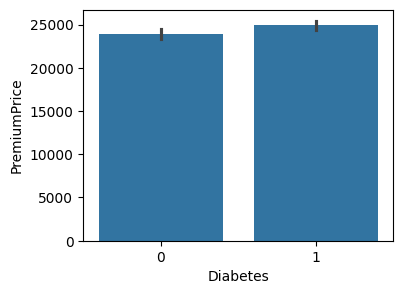

In [227]:
# Barplots

plt.figure(figsize = (4,3))
sns.barplot(x = df['Diabetes'], y = df['PremiumPrice'])
plt.show()


Someone having diabetes is likely to pay a higher premium price

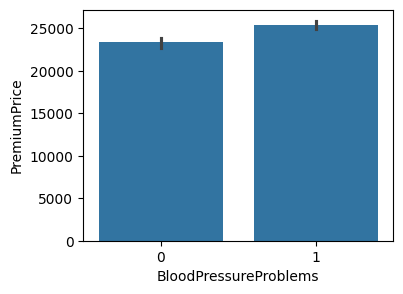

In [225]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['BloodPressureProblems'], y = df['PremiumPrice'])
plt.show()


Someone having Blood Pressure Problems is likely to pay a higher premium price

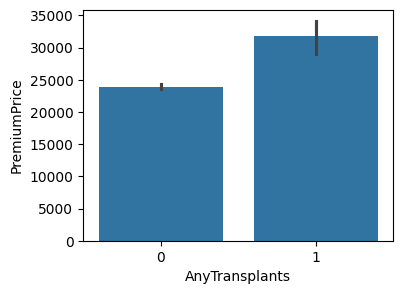

In [223]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['AnyTransplants'], y = df['PremiumPrice'])
plt.show()

Someone who has done previous Transplants is likely to pay a higher premium price

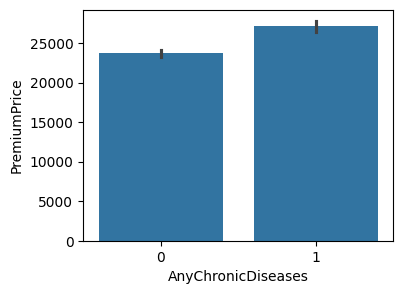

In [221]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['AnyChronicDiseases'], y = df['PremiumPrice'])
plt.show()

Individuals with chronic diseases are likely to pay a higher premium price

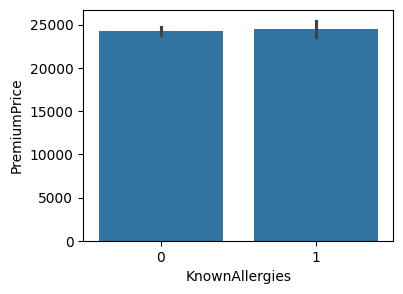

In [229]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['KnownAllergies'], y = df['PremiumPrice'])
plt.show()

Individuals with allergies are likely to pay a higher premium price

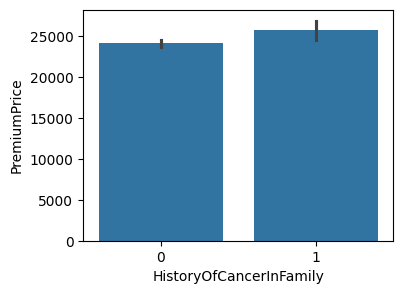

In [232]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['HistoryOfCancerInFamily'], y = df['PremiumPrice'])
plt.show()

Individuals with history of cancer in their families are likely to pay a higher premium price

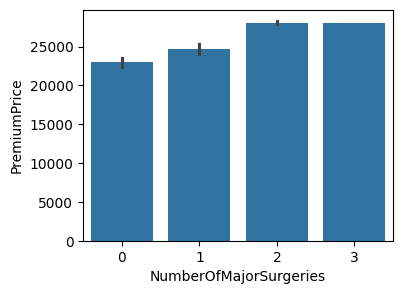

In [235]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['NumberOfMajorSurgeries'], y = df['PremiumPrice'])
plt.show()

The higher the number of surgeries the higher the premium price one is likely to pay

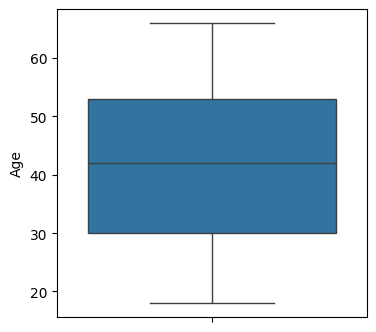

In [183]:
#Checking for outliers

#Boxplot for age

plt.figure(figsize = (4,4))
sns.boxplot(df['Age'])
plt.show()

No outliers in the age column

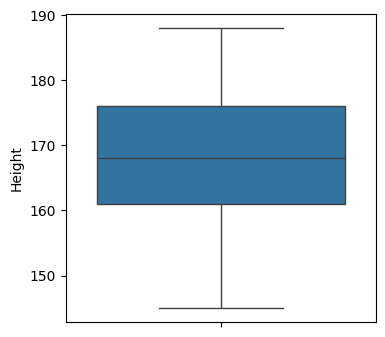

In [72]:
#Boxplot for height

plt.figure(figsize = (4,4))
sns.boxplot(df['Height'])
plt.show()

No outliers in the height column

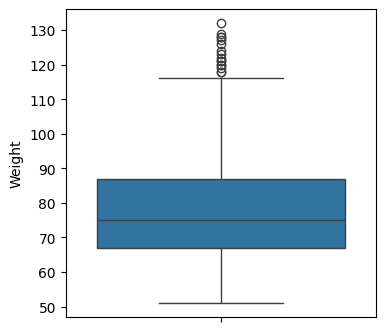

In [74]:
#Boxplot for weight

plt.figure(figsize = (4,4))
sns.boxplot(df['Weight'])
plt.show()

There are outliers in the weight column

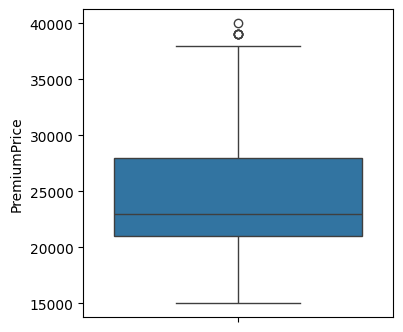

In [76]:
#Boxplot for premium price

plt.figure(figsize = (4,4))
sns.boxplot(df['PremiumPrice'])
plt.show()

There are outliers in the premium price column

In [78]:
#Getting & Removing outliers in the weight and premium price columns

#Weight

Q1 = df['Weight'].quantile(0.25) #getting the first quartile
Q3 = df['Weight'].quantile(0.75) #getting the third quartile

IQR = Q3-Q1 #getting the inter quartile range

min_weight = Q1 - IQR*1.5 # getting the lower bound
max_weight = Q3 + IQR*1.5 #getting the upper bound

weight_outliers = df[(df['Weight'] < min_weight) | (df['Weight'] > max_weight)] # applying to the weight column to see the outliers

print(len(weight_outliers)) #getting the number of outliers


16


The weight column has 16 outliers

In [81]:
#Removing the outliers in the weight column

cleaned1_df = df[(df['Weight'] >= min_weight) & (df['Weight'] <= max_weight)] #getting the values that fall between the given range
cleaned1_df.shape

(970, 11)

The original dataframe had 986 rows. Our cleaned df has 970 rows, with all the outliers removed. We will proceed with the cleaned1_df as our new dataframe

In [89]:
#premium price

Q1 = cleaned1_df['Weight'].quantile(0.25) #getting the first quartile
Q3 = cleaned1_df['Weight'].quantile(0.75) #getting the third quartile

IQR = Q3-Q1 #getting the inter quartile range

min_weight = Q1 - IQR*1.5 # getting the lower bound
max_weight = Q3 + IQR*1.5 #getting the upper bound

premium_price_outliers = cleaned1_df[(cleaned1_df['Weight'] < min_weight) | (cleaned1_df['Weight'] > max_weight)] # applying to the weight column to see the outliers

print(len(premium_price_outliers)) #getting the number of outliers


3


Premium price column has 3 outliers

In [93]:
#Removing the outliers in the Premium price column

data = cleaned1_df[(cleaned1_df['Weight'] >= min_weight) & (cleaned1_df['Weight'] <= max_weight)] #getting the values that fall between the given range
data.shape

(967, 11)

The cleaned1_df dataframe had 970 rows. Our new dataset has 967 rows, with all the outliers removed. We will proceed with 'data' as our new dataframe

#### Correlation matrix

In [164]:
corr_matrix = data.corr()
corr_matrix

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210883,0.245184,-0.015778,0.047364,0.037193,-0.011483,-0.019128,-0.020672,0.430152,0.698792
Diabetes,0.210883,1.000000,0.127918,-0.035501,-0.092245,-0.004158,0.001599,-0.077361,-0.051532,0.125278,0.079185
BloodPressureProblems,0.245184,0.127918,1.000000,-0.030255,0.042330,-0.044120,-0.060987,-0.013387,0.051261,0.252929,0.165237
AnyTransplants,-0.015778,-0.035501,-0.030255,1.000000,0.036288,-0.030472,0.003786,-0.006744,-0.018369,-0.005775,0.289269
AnyChronicDiseases,0.047364,-0.092245,0.042330,0.036288,1.000000,0.045768,-0.013182,-0.026505,0.010959,0.014682,0.212416
Height,0.037193,-0.004158,-0.044120,-0.030472,0.045768,1.000000,0.079460,-0.006124,0.007598,0.034274,0.027029
Weight,-0.011483,0.001599,-0.060987,0.003786,-0.013182,0.079460,1.000000,0.043366,-0.004918,-0.012732,0.139850
KnownAllergies,-0.019128,-0.077361,-0.013387,-0.006744,-0.026505,-0.006124,0.043366,1.000000,0.115118,0.105513,0.012261
HistoryOfCancerInFamily,-0.020672,-0.051532,0.051261,-0.018369,0.010959,0.007598,-0.004918,0.115118,1.000000,0.213279,0.082210
NumberOfMajorSurgeries,0.430152,0.125278,0.252929,-0.005775,0.014682,0.034274,-0.012732,0.105513,0.213279,1.000000,0.262713


#### Heatmap

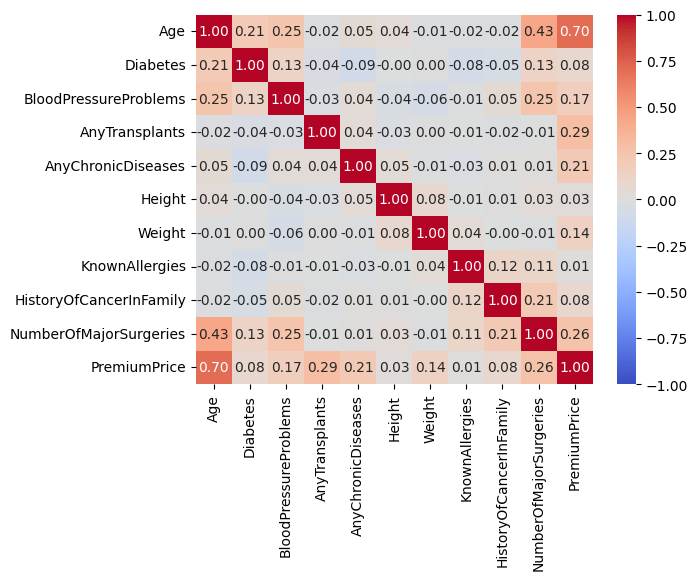

In [174]:
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show()

Age has the strongest positive correlation with premium price compared to the other variables at 0.7

### Feature Engineering


In [99]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [106]:
#Choosing our x and y variables

x = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df['PremiumPrice']

In [135]:
#splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

#Getting the mode

model = LinearRegression()

#fitting and training the model

model.fit(x_train, y_train)

#Making predictions

y_predict = model.predict(x_test)

#Checking the accuracy of the model

r2 = r2_score(y_predict, y_test)

score = round(r2, 2)
print(score *100, '%')

52.0 %


Our model accuracy using Linear Regression is 52%

In [150]:
#Using ridge regression

model = Ridge()

#fitting and training the model

model.fit(x_train, y_train)

#Making predictions

y_predict = model.predict(x_test)

#Checking the accuracy of the model

r2 = r2_score(y_predict, y_test)

score = round(r2, 2)
print(score *100, '%')

51.0 %


Our model accuracy using Linear Regression is 52%

In [152]:
#Using Lasso regression

model = Lasso()

#fitting and training the model

model.fit(x_train, y_train)

#Making predictions

y_predict = model.predict(x_test)

#Checking the accuracy of the model

r2 = r2_score(y_predict, y_test)

score = round(r2, 2)
print(score *100, '%')

52.0 %


Our model accuracy using Lasso Regression is 52%